Sraping data from Wikipedia article and save it as a csv file.

https://en.wikipedia.org/wiki/List_of_countries_with_highest_military_expenditures

---

In [49]:
from bs4 import BeautifulSoup
import requests

In [50]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_with_highest_military_expenditures'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [51]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries with highest military expenditures - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main

In [52]:
table = soup.find_all('table')[1]
table

<table class="wikitable sortable sticky-header" style="margin-left:auto;margin-right:auto">
<tbody><tr style="background:#ececec;">
<th>Rank</th>
<th>Country</th>
<th>Spending <br/> (US$ bn)</th>
<th>% of <a href="/wiki/List_of_countries_by_GDP_(nominal)" title="List of countries by GDP (nominal)">GDP</a></th>
<th>% of global spending
</th></tr>
<tr>
<td></td>
<td><b>World total </b></td>
<td align="right"><b>2,443</b></td>
<td align="right"><b>2.3</b></td>
<td align="right">100
</td></tr>
<tr>
<td><span style="visibility:hidden;color:transparent;">0</span>1</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/United_States" title="United States"><img alt="United States" class="mw-file-element" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Fla

In [53]:
titles = table.find_all('th')
titles

[<th>Rank</th>,
 <th>Country</th>,
 <th>Spending <br/> (US$ bn)</th>,
 <th>% of <a href="/wiki/List_of_countries_by_GDP_(nominal)" title="List of countries by GDP (nominal)">GDP</a></th>,
 <th>% of global spending
 </th>]

In [54]:
table_titles = [title.text.strip() for title in titles]

table_titles

['Rank', 'Country', 'Spending  (US$ bn)', '% of GDP', '% of global spending']

In [55]:
import pandas as pd

In [56]:
df = pd.DataFrame(columns = table_titles)

df

,Rank,Country,Spending (US$ bn),% of GDP,% of global spending


In [57]:
column_data = table.find_all('tr')


In [60]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    ind_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = ind_row_data

df

,Rank,Country,Spending (US$ bn),% of GDP,% of global spending
0,,World total,"2,443",2.3,100
1,01,United States,916.0,3.4,37
2,02,China[a],296.0,1.7,12
3,03,Russia,109.0,5.9,4.5
4,04,India,83.6,2.4,3.4
5,05,Saudi Arabia[a][b],75.8,7.1,3.1
6,06,United Kingdom,74.9,2.3,3.1
7,07,Germany,66.8,1.5,2.7
8,08,Ukraine,64.8,37.0,2.7
9,09,France[c],61.3,2.1,2.5


In [61]:
df

,Rank,Country,Spending (US$ bn),% of GDP,% of global spending
0,,World total,"2,443",2.3,100
1,01,United States,916.0,3.4,37
2,02,China[a],296.0,1.7,12
3,03,Russia,109.0,5.9,4.5
4,04,India,83.6,2.4,3.4
5,05,Saudi Arabia[a][b],75.8,7.1,3.1
6,06,United Kingdom,74.9,2.3,3.1
7,07,Germany,66.8,1.5,2.7
8,08,Ukraine,64.8,37.0,2.7
9,09,France[c],61.3,2.1,2.5


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  41 non-null     object
 1   Country               41 non-null     object
 2   Spending  (US$ bn)    41 non-null     object
 3   % of GDP              41 non-null     object
 4   % of global spending  41 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


In [68]:
# Change columns values to floats
df['Spending  (US$ bn)'] = df['Spending  (US$ bn)'].astype(float)

df['% of GDP'] = df['% of GDP'].astype(float)

df['% of global spending'] = df['% of global spending'].astype(float)



ValueError: could not convert string to float: '2,443'

In [69]:

# Remove non-numeric characters and convert to float
df['Spending  (US$ bn)'] = df['Spending  (US$ bn)'].str.replace(',', '').astype(float)
df['% of GDP'] = df['% of GDP'].str.replace('%', '').astype(float)
df['% of global spending'] = df['% of global spending'].str.replace('%', '').astype(float)

# Display the DataFrame to verify changes
print(df)

   Rank             Country  Spending  (US$ bn)  % of GDP  \
0               World total              2443.0       2.3   
1    01       United States               916.0       3.4   
2    02            China[a]               296.0       1.7   
3    03              Russia               109.0       5.9   
4    04               India                83.6       2.4   
5    05  Saudi Arabia[a][b]                75.8       7.1   
6    06      United Kingdom                74.9       2.3   
7    07             Germany                66.8       1.5   
8    08             Ukraine                64.8      37.0   
9    09           France[c]                61.3       2.1   
10  100               Japan                50.2       1.2   
11   11         South Korea                47.9       2.8   
12   12               Italy                35.5       1.6   
13   13           Australia                32.3       1.9   
14   14           Poland[c]                31.6       3.8   
15   15              Isr

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  41 non-null     object 
 1   Country               41 non-null     object 
 2   Spending  (US$ bn)    41 non-null     float64
 3   % of GDP              41 non-null     float64
 4   % of global spending  41 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.9+ KB


In [71]:
Q1 = df['Spending  (US$ bn)'].quantile(0.25)
Q3 = df['Spending  (US$ bn)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Spending  (US$ bn)'] < (Q1 - 1.5 * IQR)) | (df['Spending  (US$ bn)'] > (Q3 + 1.5 * IQR))]
print(outliers)


  Rank        Country  Spending  (US$ bn)  % of GDP  % of global spending
0         World total              2443.0       2.3                 100.0
1   01  United States               916.0       3.4                  37.0
2   02       China[a]               296.0       1.7                  12.0


In [72]:
df_filtered = df[df['Country'] != 'World total']

In [73]:
Q1 = df['Spending  (US$ bn)'].quantile(0.25)
Q3 = df['Spending  (US$ bn)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_filtered[(df_filtered['Spending  (US$ bn)'] < (Q1 - 1.5 * IQR)) | (df_filtered['Spending  (US$ bn)'] > (Q3 + 1.5 * IQR))]
print(outliers)


  Rank        Country  Spending  (US$ bn)  % of GDP  % of global spending
1   01  United States               916.0       3.4                  37.0
2   02       China[a]               296.0       1.7                  12.0


In [75]:
df_filtered.describe()

,Spending (US$ bn),% of GDP,% of global spending
count,40.000000,40.000000,40.000000
mean,56.647500,3.412500,2.297500
std,147.995052,5.719252,5.982688
min,5.500000,0.700000,0.200000
25%,8.400000,1.500000,0.300000
50%,17.450000,2.050000,0.700000
75%,48.475000,2.975000,2.025000
max,916.000000,37.000000,37.000000


In [74]:
# Function to calculate outliers based on IQR
def find_outliers(column):
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_filtered[(df_filtered[column] < (Q1 - 1.5 * IQR)) | (df_filtered[column] > (Q3 + 1.5 * IQR))]
    return outliers

# Find and print outliers for each column
outliers_spending = find_outliers('Spending  (US$ bn)')
outliers_gdp = find_outliers('% of GDP')
outliers_global_spending = find_outliers('% of global spending')

print("Outliers in Spending (US$ bn):")
print(outliers_spending)

print("\nOutliers in % of GDP:")
print(outliers_gdp)

print("\nOutliers in % of global spending:")
print(outliers_global_spending)

Outliers in Spending (US$ bn):
  Rank        Country  Spending  (US$ bn)  % of GDP  % of global spending
1   01  United States               916.0       3.4                  37.0
2   02       China[a]               296.0       1.7                  12.0
3   03         Russia               109.0       5.9                   4.5

Outliers in % of GDP:
   Rank             Country  Spending  (US$ bn)  % of GDP  \
3    03              Russia               109.0       5.9   
5    05  Saudi Arabia[a][b]                75.8       7.1   
8    08             Ukraine                64.8      37.0   
15   15              Israel                27.5       5.3   
19   19             Algeria                18.3       8.2   
37   37                Oman                 5.9       5.4   

    % of global spending  
3                    4.5  
5                    3.1  
8                    2.7  
15                   1.1  
19                   0.7  
37                   0.2  

Outliers in % of global spending

C:\Users\fares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


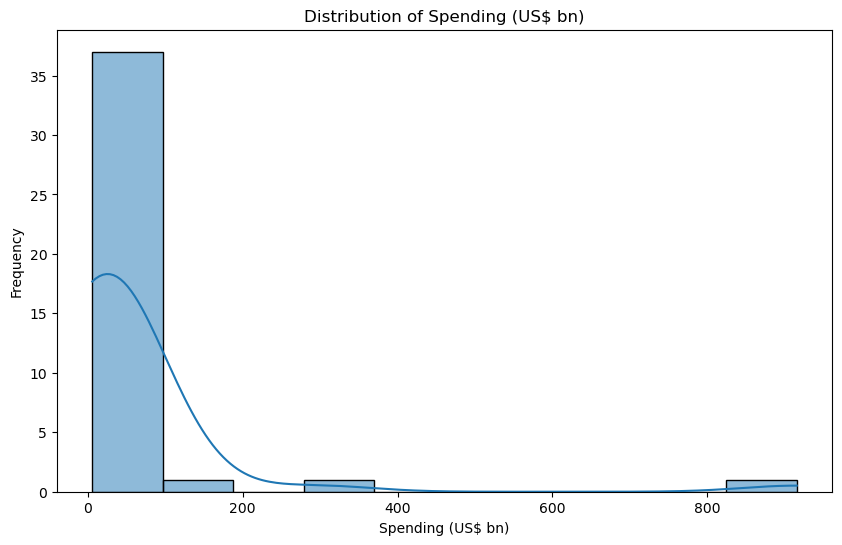

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Spending (US$ bn)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Spending  (US$ bn)'], bins=10, kde=True)
plt.title('Distribution of Spending (US$ bn)')
plt.xlabel('Spending (US$ bn)')
plt.ylabel('Frequency')
plt.show()


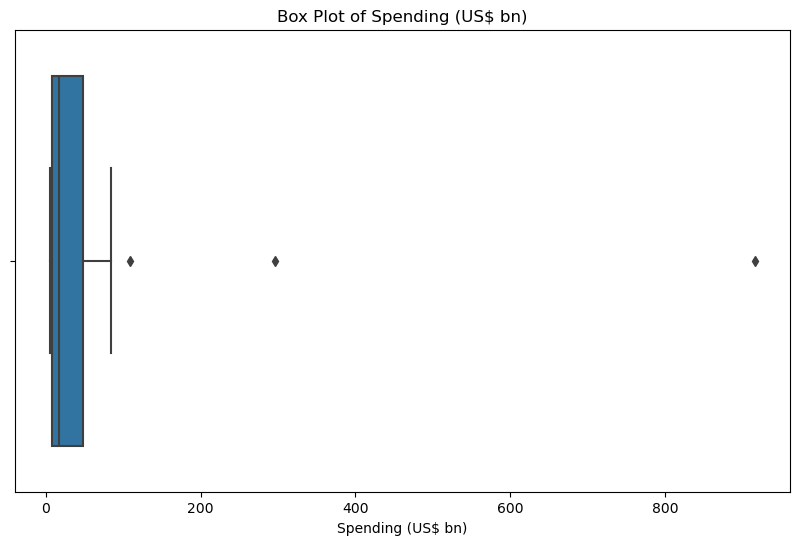

In [77]:
# Box plot for Spending (US$ bn)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Spending  (US$ bn)'])
plt.title('Box Plot of Spending (US$ bn)')
plt.xlabel('Spending (US$ bn)')
plt.show()


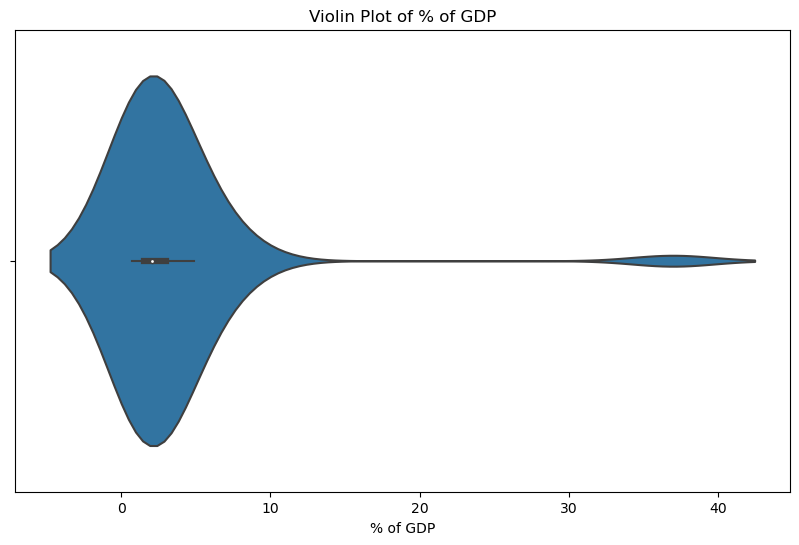

In [78]:
# Violin plot for % of GDP
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_filtered['% of GDP'])
plt.title('Violin Plot of % of GDP')
plt.xlabel('% of GDP')
plt.show()


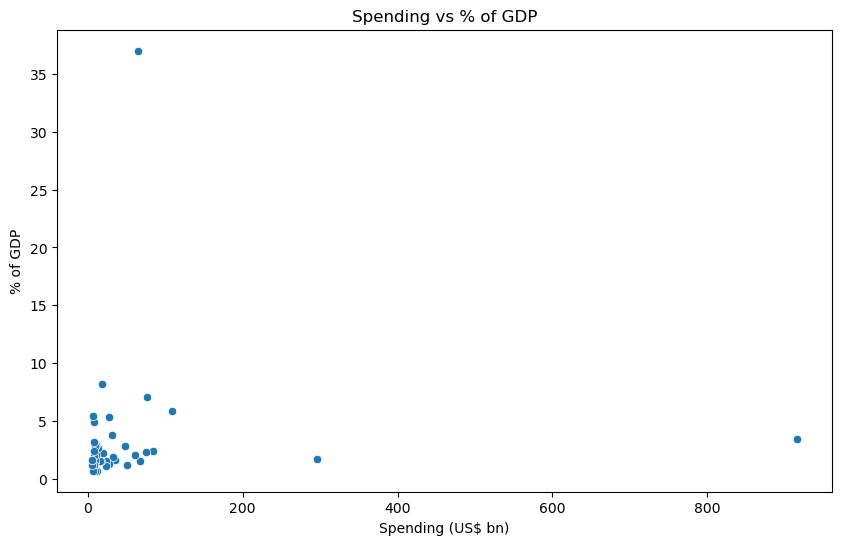

In [79]:
# Scatter plot for Spending vs % of GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Spending  (US$ bn)'], y=df_filtered['% of GDP'])
plt.title('Spending vs % of GDP')
plt.xlabel('Spending (US$ bn)')
plt.ylabel('% of GDP')
plt.show()
